In [2]:
import pandas as pd
pumpkins = pd.read_csv('./pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

Hmmm, missing data

In [4]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [6]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [7]:
print(new_pumpkins)

      Month        Package  Low Price  High Price   Price
0         4   24 inch bins     270.00      280.00  275.00
1         5   24 inch bins     270.00      280.00  275.00
2         9   24 inch bins     160.00      160.00  160.00
3         9   24 inch bins     160.00      160.00  160.00
4        11   24 inch bins      90.00      100.00   95.00
...     ...            ...        ...         ...     ...
1752      9  22 lb cartons      14.75       14.75   14.75
1753      9   36 inch bins     275.00      275.00  275.00
1754      9   36 inch bins     275.00      275.00  275.00
1755      9   36 inch bins     275.00      275.00  275.00
1756      9   36 inch bins     275.00      275.00  275.00

[1757 rows x 5 columns]


In [8]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [9]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Let's visualize!

In [10]:
import matplotlib.pyplot as plt

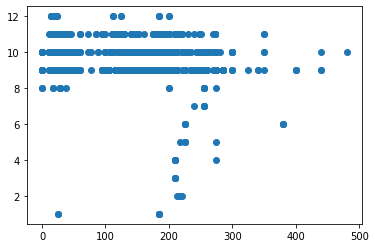

In [11]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

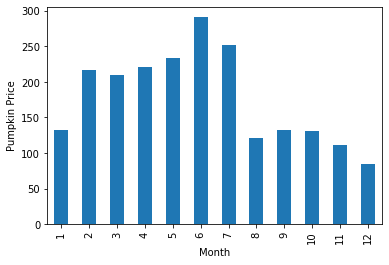

In [12]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

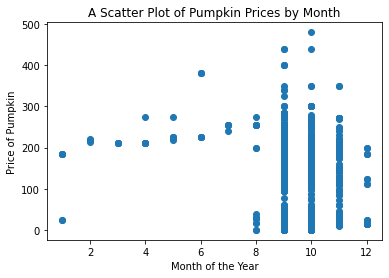

In [16]:
plt.scatter(month, price)
plt.xlabel("Month of the Year")
plt.ylabel("Price of Pumpkin")
plt.title("A Scatter Plot of Pumpkin Prices by Month")
plt.show()

I prefer matplotlib over seaborn personally, as i am more familiar with it. However, I recognize the seaborn does have benefits for certain people.

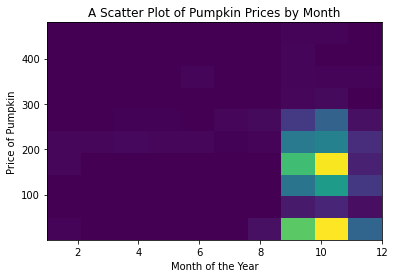

In [17]:
plt.hist2d(month, price)
plt.xlabel("Month of the Year")
plt.ylabel("Price of Pumpkin")
plt.title("A Scatter Plot of Pumpkin Prices by Month")
plt.show()

This plot shows a concentration of pumpkins in the later months